# Algorithm Analysis and Big Oh Notation

We now start to look at the process of *algorithm analysis*. As the name implies, this topic revolves around analyzing algorithms, mostly with regards to their *running time*.

Say we have a specific problem we have to solve, such as sorting a list of integers. There will often be different algorithms to solve the same problem that we can choose from. But which should we choose? Well, if the different algorithms have the same outcome: a sorted list, then one criteria that would be naturally to use, would be how fast the algorithm is, which is also called the *running time* of the algorithm.

Let us say we have implemented a specific sorting algorithm. We can now run our algorithm, and simply measure how long it takes to sort some list. This is called *profiling*, and it is a topic we will return to later in IN1910. However, how long the algorithm takes, will tend to depend on the size of the list it has to sort. We can therefore give it inputs of different sizes $n$, and measure the time it takes for each one. Plotting a plot of run time vs number of elements, $t(n)$, shows us how the sorting algorithm scales with the input size.

Now, if we have implemented a few different sorting algorithms. We can make such a curve for each algorithm, and thus compare them. However, this approach has a few major problems:
1. To measure the run-time in this manner, we need to actually execute the algorithm. This has two implications: (1) We need to have implemented our algorithm. This is annoying, because we would rather analyse different algorithms to find the best one, and then implement the best one for our given use case. Having to implement all of them first, means we don't save any time. (2) For testing large inputs, executing an algorithm can actually take really long.

2. The concept of *running time* is strongly dependent on what computer you run it on. A faster computer will have a lower runtime. Thus to compare algorithms we need to do all experiments on the same machine. Even on the same machine, running a program twice in a row is not guaranteed to take equally long, as other processes on the machine might make things slower. Meaning we have to actually perform *multiple* experiments per input. Taking even longer.

Both of these downsides means comparing algorithms in this manner can take a lot of time, and might not work that well to begin with. We need to find some better way to compare algorithms.



## Theoretical Algorithm Analysis

To get around the points of actually implementing and running our algorithms, we turn instead to analyzing them theoretically. This actually makes sense, because algorithms themselves are *abstract* concepts that exist only in theory. Thus we turn from *testing implementations* to *analyzing algorithms*. This also gets around the second point, because our analysis will no longer be connected to any given machine.

### Counting Operations

As we are moving away from the concept of "runtime", as this is dependent on a given machine, we need to find some other measure of how "long" an algorithm takes to run. What we are actually trying to measure is not how long it takes in time, but how *much work* an algorithm has to perform.

To measure how much work we are performing when we perform an algorithm, we have to go through the algorithm and simply count the number of operations we perform. Here we need to be more precise in what we mean by "operation". An "operation" in this sense, is any of the *primitive* operations the computer performs. Examples of a primitive operation are:
* assigning a value to a (simple) variable
* calling a method
* comparing two numbers
* indexing into an array
* following an object reference
* return from a method
Now, these operations do not take exactly the same amount of time, but to make algorithm analysis simpler, we assume that they do, and count all into the same lump sum of operations performed.

For numerical algorithms, we often instead count the number of *floating point* operations, which is addition, subtraction, multiplication or division of two floating point numbers. Different numerical algorithms, say for example the forward euler scheme and the Runge-Kutta 4 scheme for solving ODEs, might make a very different amount of these operations.

### Example: Finding the biggest element in a list

Let us look at a simple algorithm for finding the biggest number in a list of numbers: We write it out in Python, as an alternative to pseudocode. However, note that we are trying to analyze the abstract algorithm itself, and not any given implementation in Python.

```Python
def find_biggest(numbers):
    biggest = numbers[0]

    for i in range(1, len(numbers)):
        if numbers[i] > biggest:
            biggest = numbers[i]

    return biggest
```

Let us now count the number of operations in this algorithm. The first assignment is two operations, because we assign a value to `biggest`, and read `numbers[0]`, each a single operations. At the end we return a number, which is also a single operation. So independent of the size of the input list, we use 3 operations in addition to the loop.

Next we turn to the loop, which will run $(n-1)$ times, because we can skip the first element of the list. For each iteration, we will assign the counter `i` (1 operation), we will perform one comparison between `biggest` and the next element in the list (2 operations, one for the comparison and one for the indexing). And if the new element is actually larger, we assign it (2 operations, one for the indexing, one for the assignment). Thus each iteration will be 3 or 5 operations.

If the first element of the input array happens to be the biggest, then we never reassign inside the loop, and the total number of operations will be

$$3(n-1) + 3 = 3n,$$

but on the flip-side, if the input list is ordered in increasing order, we will reassign every single time, giving

$$5(n-1) + 3 = 5n - 2,$$

total operations.

This means that running the `find_biggest` algorithm will take between $3n$ and $5n-2$ operations, depending on the input. As you can see, analyzing even a very simple algorithm can be annoying for two reasons: (1) Getting the exact count is a bit finicky, what should count as one operation, what should count as two? (2) The input might vary not only in size ($n$), but also in layout.

We will now introduce two concepts to make our analysis easier.




## Best-case, Average-case, Worst-case

As we saw in the `find_biggest` example, our algorithm will have a different number of operations depending on exactly what the input is. We can refer to the different cases by calling them the "best-case" and the "worst-case" scenarios. In our example, having the first element be the biggest was the "best-case", because then we do not have to do any reassignment. Having all elements in increasing order would be the "worst-case", because it would take the longest. Somewhere in the middle lies the "average-case", which would be operations we would need on the "average" input.

Often when analyzing algorithms, we simply stick with analysing worst-case. If there is a best-case that is great, then that is nice, but often we want to have a guarantee about how slow an algorithm can be in the worst-case, and so this is the best to analyze. Analyzing the average-case is even harder, because we would need to find out what the "average" input is, which would depend on the problem setting and the use case.

Put simply: To avoid having to think to much about different orders of input and such, we simply stick to analyzing the worst-case in most situations. Sometimes we also do the best-case. We rarely analyze the average-case.


## Asymptotic Analysis with Big Oh Notation

The other simplification we do is to disregard small details, and instead focus solely on how the algorithm *scales*. This is known as asymptotic analysis. It is most common to do this through the use of something called [Big Oh notation](https://en.wikipedia.org/wiki/Big_O_notation), sometimes referred to as "big O" instead of "big Oh". We call it "Big Oh" because we write it out as a function inside a big Oh, for example: $\mathcal{O}(n^2)$. There is literally a big O there.

As before, we are still trying to classify how much work an algorithm has to perform, as a function of the problem "input size", often denoted $n$. For array operations, $n$ will often be the length of an array or list, but it can also for example be an integer: for example, when checking wether $n$ is prime, or finding the $n$'th Fibonacci number. Or it could be the size of a matrix in linear algebra operation: for example, what is the cost of multiplying two $n \times n$ matrices? Or finding the eigenvalues of a $n\times n$ matrix.

Now, we want to classify the *cost* of the algorithm in terms of the problem size. Note here that the problem size will be non-negative: $n\geq 0$. You can for example sort a list of 1, or 0 elements, but saying you are sorting a list with a negative number of elements doesn't make sense. Also, the cost of the algorithm will tend to either stay flat, or grow with the problem size $n$, it would have to be a very strange problem or algorithm to become *easier* as the problem grows!

### Finding the Big Oh cost

As we saw an example of earlier, we can go through all the steps in an algorithm, and count the number of *primitive operations*, and come of with an expression for the cost of the algorithm, say for example:

$$f(n) = 2n^2 + 4n + 1.$$

Big Oh notation is a way to simplify this expression, throwing away unnecessary details, trying only to describe how the whole thing scales as $n$ grows. The $+1$ part is definitely unimportant, and when $n$ grows large, the quadratic term ($2n^2$) will outgrow the linear term ($4n$) fast. So we therefore first say that, at least for larger $n$:

$$f(n) \approx 2n^2.$$

But with big Oh, we go one step further, and disregard the coefficient 2 as well. We would then write

$$f(n) = \mathcal{O}(n^2).$$

We read this out as: $f$ is big Oh $n^2$.

We can do the same for any function, we simply keep the fastest-growing term, and throw away any coefficients on it. For polynomials, this is nearly trivial, simply check what the highest power is, so a $k$-th degree polynomial, would be $\mathcal{O}(n^k)$. However, we can also do it for other, more complicated functions:
* $7n-2$ would be $\mathcal{O(n)}$
* $n\log n + 2n + 10^{100}$ would be $\mathcal{O}(n\log n)$
* $2^n + n^{10}$ would be $\mathcal{O}(e^n)$, here we have changed the base from 2 to $e$, but this adds a constant coefficient, which we throw away.

Similarly, some algorithms do not increase their cost with $n$ at all, as we throw away the "coefficients" also in this case, these will be $\mathcal{O(1)}$. So for example
* $f(n) = 1$ is $\mathcal{O}(1)$
* $f(n) = 1000$ is $\mathcal{O}(1)$
* $f(n) = 2^{100}$ is $\mathcal{O}(1)$


### What Big Oh Tells Us

What we are trying to capture with the Big Oh is how the function scales with $n$. We would for example know that a $\mathcal{O}(1)$ does *not* grow with the problem size, we say that the cost is *constant*. Knowing just the big Oh of the algorithm doesn't actually say anything about how big that cost it, it might be small, or it might be big, but we know that it does not depend on the problem size.

Similarly, if we have an algorithm that is $\mathcal{O}(n)$, we say that is scales *linearly*. We then know that doubling the problem size, will approximately double the cost of the algorithm. We say approximately, because we might have thrown away some terms that mean it doesn't *exactly* double, but for larger $n$, it will be close to true. An algorithm that is $\mathcal{O}(n^2)$ scales *quadratically*, meaning that doubling the problem size will quadruple the cost of the algorithm.

In a way, the big Oh is a way to divide all algorithms into categories of how they scale. If we need to choose an algorithm for a specific problem, and one is $\mathcal{O}(n)$ and the other is $\mathcal{O}(n^2)$, then we know the first scales better than the second. Does this mean that it is the best choice? Not necessarily, because we don't actually know how costly either of the algorithms is, but because of the scaling, the first option will eventually outperform the second, if $n$ becomes large enough.

### The Most Important Big Oh Classifications

As many functions will fall into the same Big Oh classification, there actually aren't that many categories they can go into. Here are perhaps the most common ones and what we call them:

| Big Oh                  | Name                  |
| ----------------------- | --------------------- |
| $\mathcal{O}(1)$        | constant              |
| $\mathcal{O}(\log n)$   | logarithmic           |
| $\mathcal{O}(n)$        | linear                |
| $\mathcal{O}(n \log n)$ | loglinear/quasilinear |
| $\mathcal{O}(n^2)$      | Quadratic             |
| $\mathcal{O}(n^3)$      | Cubic                 |
| $\mathcal{O}(n^k)$      | Polynomial            |
| $\mathcal{O}(e^n)$      | Exponential           |
| $\mathcal{O}(n!)$       | Factorial             |

Note that an algorithm can actually have fractional exponent scaling, for example $\mathcal{O}(n^{1.5})$, but this is rare.


### Formal Definition ([Borrowed from the Wikipedia Article](https://en.wikipedia.org/wiki/Big_O_notation))

Let $f$ be a real or complex valued function and $g$ a real valued function, both defined on some unbounded subset of the real positive numbers, such that $g(x)$ is strictly positive for all large enough values of $x$. One writes

$${\displaystyle f(x)=O(g(x))}$$

if and only if for all sufficiently large values of $x$, the absolute value of $f(x)$ is at most a positive constant multiple of $g(x)$. That is, $f(x) = O(g(x))$ if and only if there exists a positive real number $M$ and a real number $x_0$ such that

$${\displaystyle |f(x)|\leq \;Mg(x){\text{ for all }}x\geq x_{0}.} $$

Note that from this definition, we could technically say that for example
* $f(n) = n + 1$ is $\mathcal{n^3}$.

As this actually adheres to the definition. Similarly, we could add coefficients to $g$:
* $f(n) = 4n^2+4$ is $\mathcal{O}(n^2)$.

However, it is not customary to do so. We basically want to choose a $g$ that is as simple as possible, and therefore we purposefully select the single, fastest growing term, and avoid coefficients. This still adheres to the definition, because we chan choose an $M$ freely.


## Returning to our example

Looking back to our `find_biggest` algorithm, we found that it had a best-case of $3n$ and a worst-case of $5n-2$. However, both of these are $\mathcal{O}(n)$, so we say that our algorithm is linear. Note that this is true for the worst-, average- and best case scenarios, it is true for all scenarios. And so by using big Oh, we do not have to be so specific about our input, it is generally true.

Similarly, if we are only interested in the big Oh of our algorithm, then the analysis itself becomes *a lot* simpler to perform. Looking back at the code:

In [1]:
def find_biggest(numbers):
    biggest = numbers[0]

    for i in range(1, len(numbers)):
        if numbers[i] > biggest:
            biggest = numbers[i]

    return biggest

We see that we need to iterate through the list, so we will be performing some steps $n$ times, but the steps inside the loop do not depend on the size of the list, so we know they will just lead to some coefficient in front of $n$, which will be thrown away again. So, as we loop over the whole input list once, we have $\mathcal{O}(n)$ operations. Easy and fast.

We can in fact verify this by timing it for a few input sizes

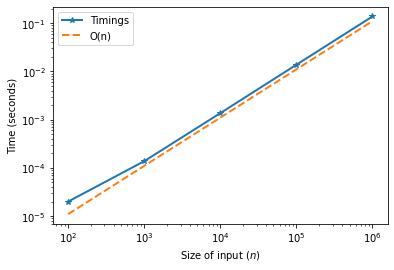

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

times = []
Ns = np.array([100, 1000, 10_000, 100_000, 1_000_000])
for n in Ns:
    x = np.random.random(size=n)
    # Start the time
    t0 = time.perf_counter()
    # Run the code
    find_biggest(x)
    # Stop the time and append the timing to the list
    times.append(time.perf_counter() - t0)

fig, ax = plt.subplots()
ax.loglog(Ns, times, label="Timings", marker="*", linewidth=2)
ax.loglog(Ns, 1.1 * 1e-7 * Ns, label="O(n)", linestyle="--", linewidth=2)
ax.legend()
ax.set_xlabel("Size of input ($n$)")
ax.set_ylabel("Time (seconds)")
plt.show()

Notice that we plot the timings as a function of the input size in a `loglog` plot. Also note that we also plot the function $1.1 \times 10^{-7} \times N$ which is $\mathcal{O}(n)$. We see that the timings align very well with a function that is $\mathcal{O}(n)$ and therefore we can indeed conclude the the function is $\mathcal{O}(n)$.


### Another example: Triangle Numbers

Let us say we define an algorithm for triangle numbers, i.e., the sum of the numbers

$$1, 2, \ldots, n.$$

An algorithm for finding these is simply to carry out the sum step by step:
```Python
def triangle(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```
This function loops over $n$ numbers, and carries out a constant number of steps for each number, meaning the cost of this algorithm will be $\mathcal{O}(n)$.

For the case of triangle numbers however, this is an alternative algorithm we can use, which comes from the fact that there is an analytic expression for the $n$'th triangle number, namely: $n(n+1)/2$. So we could alternatively do:
```Python
def triangle(n):
    return n*(n+1)/2
```
What is the cost of this algorithm? Well, we do one addition, one multiplication, and one division, regardless of what $n$ is. So this algorithm is $\mathcal{O}(1)$. The fact that we found an analytic expression gave us a constant cost function, meaning it scales much better for large $n$.


## Another example: Matrix-Matrix Multiplication

Say we want to write a function to multiply two $n\times n$ matrices together. What will be the cost of such a function? Well, if we multiply two $n\times n$ matrices, our resulting matrix will also be $n\times n$. The resulting matrix will thus have $n^2$ elements we need to compute.

To compute one element of the resulting matrix, we need to compute the dot product of the row of one matrix with the column of the other, as both have $n$ elements, we carry out $\mathcal{O}(n)$ operations (some products, some summation) to compute one element of the final matrix.

Thus, we compute $n^2$ elements at a cost of $\mathcal{O}(n)$ each, which means the total cost of matrix-matrix multiplication is $\mathcal{O}(n^3)$. This means the cost of multiplying matrices grows very fast as the size of the matrices grow. If the matrices double in size, the cost increases by almost tenfold.

Now, interestingly enough, the $\mathcal{O}(n^3)$ cost we find for the "naive" matrix-matrix multiplication algorithm turns out to be sub-optimal. Several clever techniques have been found to optimize this multiplication and make it scale better. This is very important for linear algebra computations involving large matrices, of which many exist.


```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Bound_on_matrix_multiplication_omega_over_time.svg/600px-Bound_on_matrix_multiplication_omega_over_time.svg.png
---
width: 600px
name: matrix-mult
---
This graph shows the best-scaling known algorithm for matrix-matrix multiplication over time. The current best scaling was published in 2014 by François Le Gall, and has a scaling of $\mathcal{O}(n^{2.3728642...})$
```



Looking at the graph and the improvements found over time, it is easy to start to wonder where it will end, and as of now, the theoretical optimal scaling of matrix-matrix multiplication is unknown. However, we do know that there is a theoretical limit of $\mathcal{O}(n^2)$, simply due to the fact that two multiply the $n \times n$ matrices together requires at least reading out the elements of those matrices, which in itself is $\mathcal{O}(n^2)$. However, wether it is actually possible to make an algorithm that reaches $\mathcal{O}(n^2)$ is not known, no one has been able to prove, or disprove, that this limit is reachable.


## Looking to Next Week

If this short introduction to big Oh confused you a bit, do not worry to much. In the next lecture we will start to analyze and compare the performance of our dynamic array and our linked list using big Oh. And hopefully, analyzing some concrete problems will make things a bit more understandable.